In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Merge 2018 Evictions w/ 2018 IG, 2019 IG 
- ig columns overlapping is ok bc we gotta graph them all

In [2]:
ev = pd.read_csv('clean_data/2018_ev_rates.csv')
ev.head()

,geoid,Non Payment,Breach,Nuisance,Illegal Use,Failure to Sign Renewal,Access Denial,Unapproved Subtenant,Owner Move In,Demolition,...,Ellis Act WithDrawal,Condo Conversion,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Total Evictions,hh_1000
0,60750124022,0.0,0.000000,0.000000,0.691563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.905947,0.0,103.734440,1.446
1,60750332032,0.0,38.232795,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,38.232795,1.177
2,60750332043,0.0,32.676349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,32.676349,1.928
3,60750332031,0.0,22.900763,0.381679,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,23.282443,2.620
4,60750332041,0.0,17.492711,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,17.492711,1.029


In [3]:
ig18 = pd.read_csv('clean_data/ig_rates_2018.csv')
ig18.head()

,geoid,children,married,renter,vacant,age=25-29,age=30-34,age=35-39,age=40-44,age=45-49,...,ethnicity=ASIAN,ethnicity=BLACK,ethnicity=LATINX,ethnicity=OTHER,ethnicity=WHITE,loc_type=MFDU,loc_type=Retirement Home,loc_type=SFDU,loc_type=Trailer,hh_100
0,60750101001,5.900151,3.025719,98.487141,0.000000,16.187595,18.003026,14.220877,10.136157,7.715582,...,21.482602,2.571861,8.018154,0.453858,61.422088,85.022693,0.000000,14.977307,0.0000,6.61
1,60750101002,9.080717,11.210762,72.253363,0.000000,8.352018,12.668161,12.219731,9.192825,8.632287,...,24.327354,1.681614,7.230942,0.224215,60.033632,71.468610,3.475336,25.056054,0.0000,17.84
2,60750102001,8.891109,18.581419,49.450549,0.099900,8.691309,10.489510,10.289710,10.889111,6.993007,...,9.990010,1.298701,5.194805,0.199800,75.224775,56.943057,0.000000,42.857143,0.1998,10.01
3,60750102002,8.263889,8.680556,74.652778,0.138889,10.902778,16.250000,13.263889,8.333333,9.027778,...,7.361111,0.625000,4.444444,0.138889,77.777778,76.597222,0.000000,23.402778,0.0000,14.40
4,60750102003,8.032129,9.906292,66.666667,0.000000,11.512718,14.056225,11.646586,8.299866,8.567604,...,12.182062,1.204819,4.149933,0.267738,74.297189,72.423025,0.000000,27.576975,0.0000,7.47


In [4]:
ig19 = pd.read_csv('clean_data/ig_rates_st_2019.csv')
ig19.head()

,geoid,children,married,renter,vacant,age=25-29,age=30-34,age=35-39,age=40-44,age=45-49,...,ethnicity=ASIAN,ethnicity=BLACK,ethnicity=LATINX,ethnicity=OTHER,ethnicity=WHITE,loc_type=MFDU,loc_type=Retirement Home,loc_type=SFDU,loc_type=Trailer,hh_100
0,60750101001,8.363636,4.727273,98.181818,0.000000,10.909091,19.636364,13.090909,8.727273,8.727273,...,18.909091,3.272727,7.272727,0.000000,62.909091,96.363636,0.000000,3.636364,0.0,2.75
1,60750101002,13.860252,18.556701,71.019473,0.000000,7.101947,9.621993,9.621993,6.758305,7.789233,...,28.407789,1.603666,6.071019,0.229095,58.075601,75.945017,3.436426,20.618557,0.0,8.73
2,60750102001,13.636364,21.780303,51.893939,0.189394,7.386364,9.090909,11.174242,8.333333,5.303030,...,8.901515,1.325758,5.681818,0.189394,75.568182,60.984848,0.000000,39.015152,0.0,5.28
3,60750102002,11.138311,11.383109,74.541004,0.122399,9.057528,15.789474,11.750306,8.078335,6.976744,...,8.323133,1.223990,5.018360,0.000000,78.580171,78.090575,0.000000,21.909425,0.0,8.17
4,60750102003,12.121212,13.519814,68.764569,0.000000,9.790210,13.986014,9.790210,8.158508,7.459207,...,11.188811,0.699301,6.293706,0.699301,70.396270,80.419580,0.000000,19.580420,0.0,4.29


Joining

In [5]:
len(ev), len(ig18), len(ig19)

(580, 587, 586)

In [6]:
df = pd.merge(left=pd.merge(left=ev, right=ig18, on='geoid', how='inner'), right=ig19, on='geoid', how='inner')
df.head()

,geoid,Non Payment,Breach,Nuisance,Illegal Use,Failure to Sign Renewal,Access Denial,Unapproved Subtenant,Owner Move In,Demolition,...,ethnicity=ASIAN_y,ethnicity=BLACK_y,ethnicity=LATINX_y,ethnicity=OTHER_y,ethnicity=WHITE_y,loc_type=MFDU_y,loc_type=Retirement Home_y,loc_type=SFDU_y,loc_type=Trailer_y,hh_100_y
0,60750124022,0.0,0.000000,0.000000,0.691563,0.0,0.0,0.0,0.0,0.0,...,17.805755,0.359712,7.733813,0.359712,62.769784,98.741007,0.0,1.258993,0.0,5.56
1,60750332032,0.0,38.232795,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,11.698113,1.509434,21.509434,0.377358,59.622642,0.000000,0.0,100.000000,0.0,2.65
2,60750332043,0.0,32.676349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,18.702290,0.381679,16.412214,0.000000,56.106870,59.541985,0.0,40.458015,0.0,2.62
3,60750332031,0.0,22.900763,0.381679,0.000000,0.0,0.0,0.0,0.0,0.0,...,20.664207,1.291513,11.254613,0.000000,57.933579,72.140221,0.0,27.859779,0.0,5.42
4,60750332041,0.0,17.492711,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,13.294798,3.468208,23.121387,0.000000,52.601156,0.000000,0.0,100.000000,0.0,1.73


In [7]:
df.columns

Index(['geoid', 'Non Payment', 'Breach', 'Nuisance', 'Illegal Use',
       'Failure to Sign Renewal', 'Access Denial', 'Unapproved Subtenant',
       'Owner Move In', 'Demolition', 'Capital Improvement',
       'Substantial Rehab', 'Ellis Act WithDrawal', 'Condo Conversion',
       'Roommate Same Unit', 'Other Cause', 'Late Payments',
       'Lead Remediation', 'Development', 'Good Samaritan Ends',
       'Total Evictions', 'hh_1000', 'children_x', 'married_x', 'renter_x',
       'vacant_x', 'age=25-29_x', 'age=30-34_x', 'age=35-39_x', 'age=40-44_x',
       'age=45-49_x', 'age=50-54_x', 'age=55-59_x', 'age=60-64_x', 'age=65+_x',
       'age=65-69_x', 'age=70-74_x', 'age=75+_x', 'age=<25_x',
       'ethnicity=ASIAN_x', 'ethnicity=BLACK_x', 'ethnicity=LATINX_x',
       'ethnicity=OTHER_x', 'ethnicity=WHITE_x', 'loc_type=MFDU_x',
       'loc_type=Retirement Home_x', 'loc_type=SFDU_x', 'loc_type=Trailer_x',
       'hh_100_x', 'children_y', 'married_y', 'renter_y', 'vacant_y',
       'age=2

In [8]:
df.drop(columns=['hh_1000', 'hh_100_x', 'hh_100_y'], inplace=True)

In [9]:
'hix_x'.replace('_x', '_18')

'hix_18'

In [10]:
cols = [
       'geoid', 'Non Payment', 'Breach', 'Nuisance', 'Illegal Use',
       'Failure to Sign Renewal', 'Access Denial', 'Unapproved Subtenant',
       'Owner Move In', 'Demolition', 'Capital Improvement',
       'Substantial Rehab', 'Ellis Act WithDrawal', 'Condo Conversion',
       'Roommate Same Unit', 'Other Cause', 'Late Payments',
       'Lead Remediation', 'Development', 'Good Samaritan Ends',
       'Total Evictions', 'children_x', 'married_x', 'renter_x',
       'vacant_x', 'age=25-29_x', 'age=30-34_x', 'age=35-39_x', 'age=40-44_x',
       'age=45-49_x', 'age=50-54_x', 'age=55-59_x', 'age=60-64_x', 'age=65+_x',
       'age=65-69_x', 'age=70-74_x', 'age=75+_x', 'age=<25_x',
       'ethnicity=ASIAN_x', 'ethnicity=BLACK_x', 'ethnicity=LATINX_x',
       'ethnicity=OTHER_x', 'ethnicity=WHITE_x', 'loc_type=MFDU_x',
       'loc_type=Retirement Home_x', 'loc_type=SFDU_x', 'loc_type=Trailer_x',
       'children_y', 'married_y', 'renter_y', 'vacant_y',
       'age=25-29_y', 'age=30-34_y', 'age=35-39_y', 'age=40-44_y',
       'age=45-49_y', 'age=50-54_y', 'age=55-59_y', 'age=60-64_y', 'age=65+_y',
       'age=65-69_y', 'age=70-74_y', 'age=75+_y', 'age=<25_y',
       'ethnicity=ASIAN_y', 'ethnicity=BLACK_y', 'ethnicity=LATINX_y',
       'ethnicity=OTHER_y', 'ethnicity=WHITE_y', 'loc_type=MFDU_y',
       'loc_type=Retirement Home_y', 'loc_type=SFDU_y', 'loc_type=Trailer_y',
       ]
for i in range(len(cols)):
    cols[i] = cols[i].replace('_x', '_18')
    cols[i] = cols[i].replace('_y', '_19')
    
df.columns = cols
df.head()

,geoid,Non Payment,Breach,Nuisance,Illegal Use,Failure to Sign Renewal,Access Denial,Unapproved Subtenant,Owner Move In,Demolition,...,age=<25_19,ethnicity=ASIAN_19,ethnicity=BLACK_19,ethnicity=LATINX_19,ethnicity=OTHER_19,ethnicity=WHITE_19,loc_type=MFDU_19,loc_type=Retirement Home_19,loc_type=SFDU_19,loc_type=Trailer_19
0,60750124022,0.0,0.000000,0.000000,0.691563,0.0,0.0,0.0,0.0,0.0,...,8.633094,17.805755,0.359712,7.733813,0.359712,62.769784,98.741007,0.0,1.258993,0.0
1,60750332032,0.0,38.232795,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,8.679245,11.698113,1.509434,21.509434,0.377358,59.622642,0.000000,0.0,100.000000,0.0
2,60750332043,0.0,32.676349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,7.633588,18.702290,0.381679,16.412214,0.000000,56.106870,59.541985,0.0,40.458015,0.0
3,60750332031,0.0,22.900763,0.381679,0.000000,0.0,0.0,0.0,0.0,0.0,...,6.088561,20.664207,1.291513,11.254613,0.000000,57.933579,72.140221,0.0,27.859779,0.0
4,60750332041,0.0,17.492711,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.138728,13.294798,3.468208,23.121387,0.000000,52.601156,0.000000,0.0,100.000000,0.0


Overall IG comparisons - before narrowing evictions

x, y are PERCENTAGES

total evictions == eviction NOTICES per 1000 households

<AxesSubplot:xlabel='ethnicity=BLACK_18', ylabel='ethnicity=BLACK_19'>

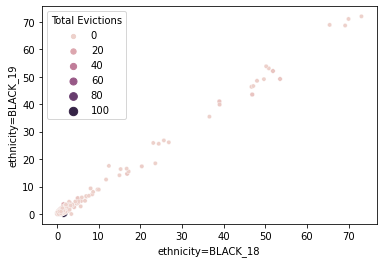

In [12]:
sns.scatterplot(x='ethnicity=BLACK_18', y='ethnicity=BLACK_19', data=df, hue='Total Evictions', size='Total Evictions')

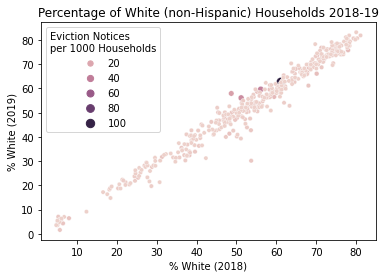

In [35]:
scatter = sns.scatterplot(x='ethnicity=WHITE_18', y='ethnicity=WHITE_19', data=df[df['Total Evictions'] > 0], hue='Total Evictions', size='Total Evictions')
plt.title('Percentage of White (non-Hispanic) Households 2018-19')
plt.xlabel('% White (2018)')
plt.ylabel('% White (2019)')
scatter.legend().set_title('Eviction Notices\nper 1000 Households')
fig = scatter.get_figure()
fig.savefig('short_term_white.jpg') 

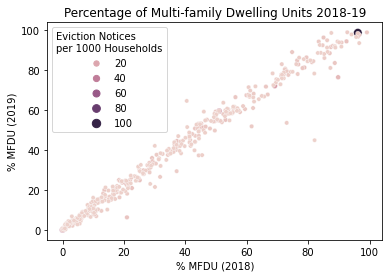

In [36]:
scatter = sns.scatterplot(x='loc_type=MFDU_18', y='loc_type=MFDU_19', data=df[df['Total Evictions'] > 0], hue='Total Evictions', size='Total Evictions')
plt.title('Percentage of Multi-family Dwelling Units 2018-19')
plt.xlabel('% MFDU (2018)')
plt.ylabel('% MFDU (2019)')
scatter.legend().set_title('Eviction Notices\nper 1000 Households')
fig = scatter.get_figure()
fig.savefig('short_term_mfdu.jpg') 

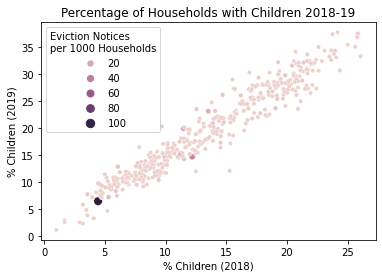

In [37]:
scatter = sns.scatterplot(x='children_18', y='children_19', data=df[df['Total Evictions'] > 0], hue='Total Evictions', size='Total Evictions')
plt.title('Percentage of Households with Children 2018-19')
plt.xlabel('% Children (2018)')
plt.ylabel('% Children (2019)')
scatter.legend().set_title('Eviction Notices\nper 1000 Households')
fig = scatter.get_figure()
fig.savefig('short_term_children.jpg') 

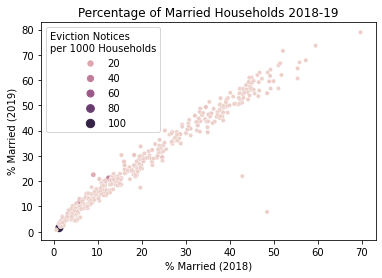

In [38]:
scatter = sns.scatterplot(x='married_18', y='married_19', data=df[df['Total Evictions'] > 0], hue='Total Evictions', size='Total Evictions')
plt.title('Percentage of Married Households 2018-19')
plt.xlabel('% Married (2018)')
plt.ylabel('% Married (2019)')
scatter.legend().set_title('Eviction Notices\nper 1000 Households')
fig = scatter.get_figure()
fig.savefig('short_term_marriage.jpg') 

In [ ]:
swarm_plot = sns.swarmplot(...)
fig = swarm_plot.get_figure()
fig.savefig(...) 